# Perceptrón simple

Recordemos el clasificador discriminante lineal por mínimos cuadrados:

\begin{equation}
\boldsymbol{w}^T \boldsymbol{x} = 0
\end{equation}

Esta ecuación se llama "función discriminante lineal". $\boldsymbol{w}$ representa un vector normal a la frontera de decisión y $\boldsymbol{x}$ es cada una de las muestras en la base de datos. Para encontrar el valor de $\boldsymbol{w}$ que separa correctamente los datos, definimos una fucnión de error:

\begin{equation}
\varepsilon = \frac{1}{2}\sum_{i=1}^n (\boldsymbol{w}^T \boldsymbol{x}_i - y_i)^2
\end{equation}

Y al minimizar ese error, obtuvimos una frontera de decisión:

\begin{equation}
\boldsymbol{w} = \left( \boldsymbol{X}^T \boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
\end{equation}


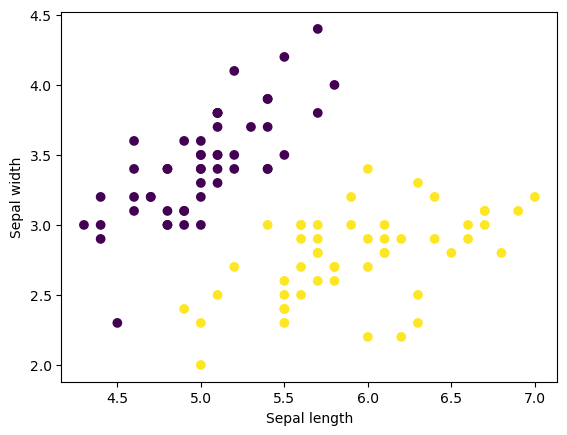

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()
X = iris.data[0:100, 0:2]  # Tomamos las dos primeras características, las primeras 100 muestras
y = iris.target[0:100] #Tomamos las primeras 100 etiquetas
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [3]:
import numpy as np
y=np.where(y==0,-1,y) #Reemplazamos los 0's por -1's 
Xm=np.hstack((X,np.ones((100,1)))) #Agregamos unos en la última columna de X
XTX = np.transpose(Xm).dot(Xm)
XTXi = np.linalg.inv(XTX)
wm=((XTXi).dot(np.transpose(Xm))).dot(y)
print(y)
print(wm.dot(np.transpose(Xm)))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
[-0.83096757 -0.42997369 -0.85876366 -0.83607755 -1.04536256 -1.01756646
 -1.1916992  -0.80828146 -0.79070532 -0.54851424 -0.78048536 -0.99999033
 -0.52582813 -1.00510031 -0.75268927 -1.32270591 -1.01756646 -0.83096757
 -0.6114626  -1.18658922 -0.42486371 -1.06804867 -1.4287803  -0.59388647
 -0.99999033 -0.33411925 -0.80828146 -0.73511313 -0.61657258 -0.85876366
 -0.64436868 -0.42486371 -1.44635644 -1.27733368 -0.54851424 -0.57120035
 -0.44754982 -1.14121699 -0.90924587 -0.71242702 -0.92682201  0.01639242
 -1.14632697 -0.92682201 -1.18658922 -0.52582813 -1.18658922 -0.9546181
 -0.8763398  -0.6897409   1.34588838  0.77076176  1.3685745   0.97493679
  1.3407784   0.57394291  0.55636677  

Ahora veamos cómo se ve la frontera de decisión. Recordemos que la clase de una nueva muestra se asigna mediante la siguiente función discriminante:

\begin{equation}
\boldsymbol{w}\boldsymbol{x}^T = \left\{ \begin{array}{l}
>0, virginica\\
<0, setosa
\end{array}\right.
\end{equation}

1.0
[4.5 2.3]
[ 0.95854437 -1.18540551 -1.57062456]


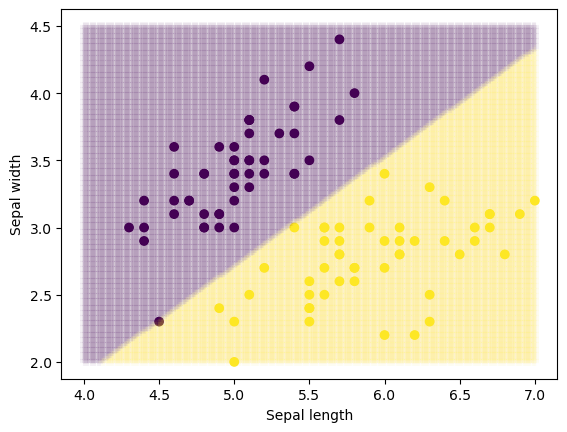

In [4]:
#Coordenadas de todos los puntos en el espacio de características
x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(wm.dot(x))

plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)
print(np.sign(wm.dot(np.append(X[41],1)))) ##La etiqueta debería ser -1!!!
print(X[41])
print(wm)

Podemos probar definiendo una función de error diferente. Si la función discriminante al ser evaluada en la i-ésima muestra de entrenamiento ($\boldsymbol{w}^T\boldsymbol{x_i}$) debe tener el mismo signo que su correspondiente etiqueta $y_i$, entonces el producto de estas dos siempre debe ser positivo. Por lo tanto, resulta obvio usar como medida del error, la suma de todas las muestras para las cuales este producto sea negativo. Éste es el criterio de error llamado **perceptrón** (se le agrega un menos para que el error sea positivo): 

\begin{equation}
\varepsilon_{p} = -\sum_{i \in \mathcal{I}}^N \boldsymbol{w}^T \boldsymbol{x}_i y_i
\end{equation}

donde $\mathcal{I}$ es el conjunto de muestras para las cuales $ \boldsymbol{w}^T \boldsymbol{x}_i y_i<0$. La minimización de este criterio de error puede hacerse siguiendo un proceso iterativo mediante el uso del gradiente descendente estocástico. Recordemos que este algoritmo actualiza iterativamente la variable que se quiere encontrar, usando el gradiente de la función de error:

\begin{equation}
\boldsymbol{w}^{(k+1)} = \boldsymbol{w}^{(k)} - \alpha\nabla \varepsilon_p
\end{equation}

Aquí, el superíndice $(k)$ denota la iteración del algoritmo, $\alpha$ es la tasa de aprendizaje y el operador $\nabla$ es el gradiente o derivada multidimensional:

\begin{equation}
\nabla\varepsilon_p = \frac{d \varepsilon_p}{d \boldsymbol{w}} = -\sum_{i \in \mathcal{I}} \boldsymbol{x}_i y_i
\end{equation}

Así que ahora podemos inicializar aleatoriamente $\boldsymbol{w}$ y aplicar el gradiente descendente estocástico para encontrar el valor óptimo de sus coeficientes (en otras palabras, la frontera que separe correctamente a todas las muestras):

\begin{equation}
\boldsymbol{w}^{(k+1)} = \boldsymbol{w}^{(k)} + \alpha \sum_{i \in \mathcal{I}} \boldsymbol{x}_i y_i
\end{equation}


[0.75564083 0.36631067 0.07039005]


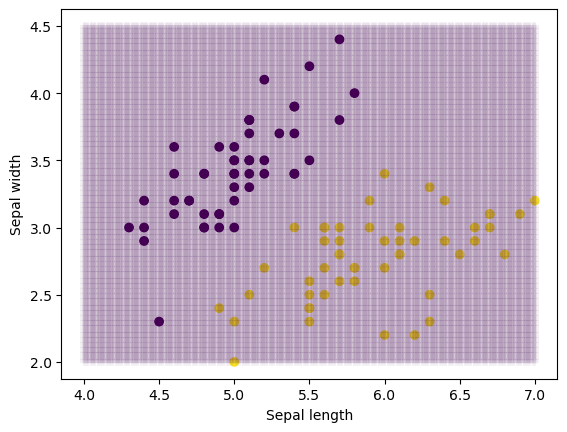

In [6]:
wnuevo = np.random.rand(3) #Generamos un vector con 3 posiciones aleatorias
print(wnuevo)
import numpy as np
x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(wnuevo.dot(x))

plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)

In [7]:
Xm=np.hstack((X,np.ones((100,1)))) #Agregamos unos en la última columna de X
alpha=0.05;
predicciones=np.zeros(100); #Vector para guardar las predicciones
wnuevo = 5*np.random.rand(3) #Generamos un vector con 3 posiciones aleatorias
terminar=False
pasos=0;
while terminar==False:
    pasos=pasos+1
    w=wnuevo;
    for i in range(len(Xm)):
        predicciones[i] = np.sign(w.dot(Xm[i]))
    errores = np.where(predicciones!=y)[0] #El signo de la predicción fue diferente al de la etiqueta
    if(len(errores)>0):
        derivada=0;
        for i in range(len(errores)):
            derivada=derivada+Xm[errores[i]]*y[errores[i]]
        wnuevo=w + alpha*derivada;
#        #Gráficas: sólo para correr fuera del notebook ---------------------------------------------------------
#         x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
#         decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
#         for i in range(len(x1)):
#             for j in range(len(x2)):
#                 x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
#                 decision[i,j] = np.sign(wnuevo.dot(x))
#         plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
#         plt.xlabel('Sepal length')
#         plt.ylabel('Sepal width')
#         plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)
#         plt.draw()
#         plt.pause(0.01)
#         plt.clf()
#        #----------------------------------------------------------------------------------------------------------
    else:
        terminar=True;

print(wnuevo)
print(pasos)

[ 21.98844605 -28.21734283 -34.06156548]
3053


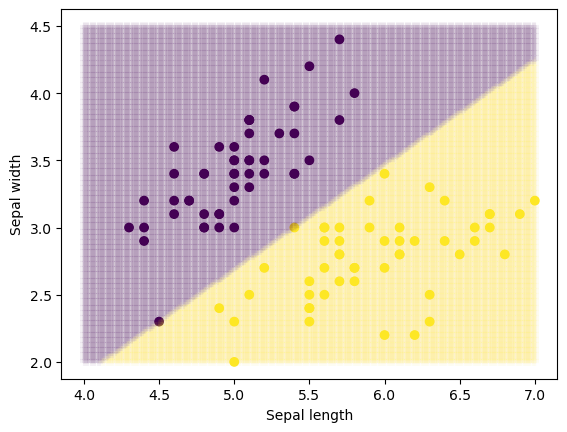

In [8]:
x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(wnuevo.dot(x))
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)

In [ ]:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=0, eta0=0.01)
clf.fit(X,y)

test=np.array([[4.5,2.3]])
clf.predict(test)

# Máquinas de vectores de soporte

Aunque el perceptrón encuentra una frontera que clasifica bien todas las muestras (a diferencia del clasificador geométrico por mínimos cuadrados), esta frontera aún está muy cerca de algunas muestras. Esto se debe a que la única condición que pusimos para resolver el problema, fue que el producto $\boldsymbol{w}^T \boldsymbol{x}$ fuera mayor que cero. Las máquinas de vectores de soporte (SVM) son un tipo de clasificador discriminante lineal que no solamente pretende separar correctamente los datos de entrenamiento, sino además **dejar el mayor margen posible**"entre las muestras y la frontera de decisión. Al dejar un margen más amplio, la capacidad de generalización del clasificador aumenta.

Para maximizar el margen, se plantea un problema de optimización cuadrático con restricciones lineales:

\begin{equation} \label{problem}
\begin{array}{ll}
  minimize & \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w} \\ 
  s.t. &y_i(\boldsymbol{w}^T\boldsymbol{x}_i) \geq 1\:\forall i
\end{array}
\end{equation}

y se resuelve usando el método de los multiplicadores de Lagrange:

\begin{equation}\label{lagrange}
L = \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w} -\sum_{i=1}^N \lambda_i[y_i(\boldsymbol{w}^T\boldsymbol{x}_i) - 1]
\end{equation}

Este problema se puede llevar a su forma dual usando las condiciones de Karush-Kuhn-Tucker (KKT), que lo convierten en:

\begin{equation}\label{dual}
\begin{array}{ll}
minimize & \sum_{i=1}^N \lambda_i - \frac{1}{2}\sum_{i,j}^N \lambda_i \lambda_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j\\
s.t. & \sum_{i=1}^N y_i \lambda_i =0\\
& \lambda_i \geq 0\\
\end{array}
\end{equation}

donde se ha hecho la sustitución:

\begin{equation}
d = \sum_{i=1}^N \lambda_i y_i \boldsymbol{x}_i \boldsymbol{x}_{nueva}
\end{equation}

Para resolver este problema, se usa un algoritmo de programación cuadrática. En Python podemos usar el paquete *qpsolvers* y algunas funciones derivadas de (Higham, 1988).

* Higham, N. J. (1988). Computing a nearest symmetric positive semidefinite matrix. Linear algebra and its applications, 103, 103-118.

In [9]:
from numpy import linalg as la

def nearestPD(A):
    B = (A + A.T) / 2
    _, s, V = la.svd(B)
    H = np.dot(V.T, np.dot(np.diag(s), V))
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2
    if isPD(A3):
        return A3
    spacing = np.spacing(la.norm(A))
    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(la.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1
    return A3

def isPD(B):
    try:
        _ = la.cholesky(B)
        return True
    except la.LinAlgError:
        return False

import qpsolvers
#Se usa la función quadprog de pracma
# min 1/2 x'Px + q'x 
# s.t.    G x <= h                              
K=Xm.dot(np.transpose(Xm)); #Matriz kernel
P=np.transpose(np.transpose(K*y)*y); #Esto sería la matriz que da lugar a 1/2 alpha' P alpha = -1/2 Sum (alpha_i alpha_j y_i y_j x'_i x_j)
q=-np.ones(len(Xm)); #Vector q'alpha = Sum(alpha_i). Los signos de P y q están invertidos para hacer maximización en vez de minimización
lambdas=qpsolvers.solve_qp(P=nearestPD(P), q=q,lb=np.zeros(100),solver="proxqp")
wsvm=0
for i in range(len(Xm)):
    wsvm=wsvm+Xm[i]*y[i]*lambdas[i]
print(wsvm)

[  6.31578785  -5.26315661 -17.31578483]


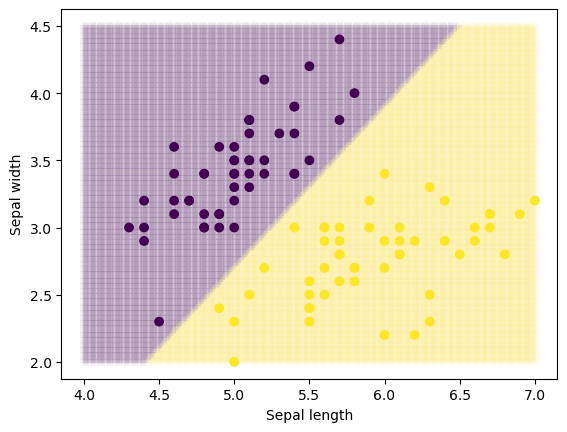

In [10]:
x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(wsvm.dot(x))
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)


Finalmente, veamos el significado de los multiplicadores de Lagrange:

<BarContainer object of 100 artists>

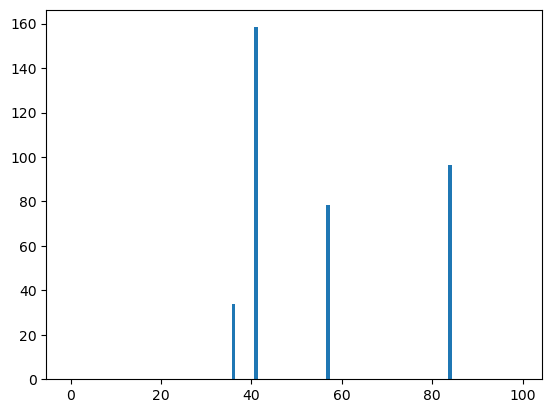

In [11]:
#print(lambdas)
plt.bar(range(100),abs(lambdas))

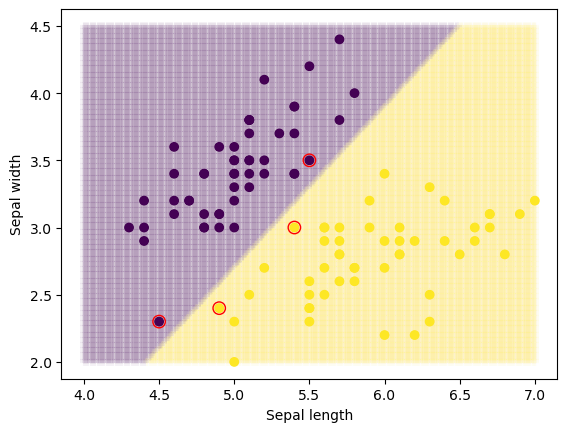

In [12]:
x1, x2 = np.meshgrid(np.linspace(4,7,200),np.linspace(2,4.5,200))
decision = np.zeros(shape=(len(x1),len(x2))) #Matriz para guardar las decisiones
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i,j],x2[i,j],1]) #Recordar que es necesario agregar un 1 al final para el término independiente
        decision[i,j] = np.sign(wsvm.dot(x))
plt.scatter(X[:, 0], X[:, 1],c=y,marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1,x2,c=decision,marker='+',alpha=0.05)
vs=np.where(lambdas>0.1)
plt.scatter(X[vs,0],X[vs,1],s=80,facecolors='none',edgecolors='red')